In [2]:
from shapely.geometry import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [3]:
default_cmap = matplotlib.cm.get_cmap('viridis')

In [5]:
class VisualEnvironment:
    def __init__(self, size=32, includeRobot=True):
        self.size = size
        self.num_obstacles = np.random.randint(low=2, high=7)
        self.type_obstacle = np.random.randint(0, 2, size=self.num_obstacles)
        self.center_obstacles = self.size * np.random.rand(self.num_obstacles, 2)
        # spec: Radius for circle and half_length for square
        # Min value is 2 and maximum 8
        self.spec_obstacle = 2 + 6 * np.random.rand(self.num_obstacles)
        # Clip the obstacle size not to exceed boundaries
        upper_bounds = self.size - self.center_obstacles
        self.spec_obstacle = np.min(np.stack((self.spec_obstacle,
                                              self.center_obstacles[:,0],
                                              self.center_obstacles[:,1],
                                              upper_bounds[:,0],
                                              upper_bounds[:,1]),axis=1), axis=1)
        self.robot_hl = 0.5
        self.robot_center = self.size * np.random.rand(2)
        self.includeRobot = includeRobot
    
    def build(self):
        '''
        Builds the shapely objects corresponding to this environment
        '''
        self.world = box(0.0, 0.0, self.size, self.size)
        self.obstacles = []
        for i in range(self.num_obstacles):
            if self.type_obstacle[i] == 0:
                obs = self.make_box(self.center_obstacles[i, :], self.spec_obstacle[i])
            else:
                obs = self.make_circle(self.center_obstacles[i, :], self.spec_obstacle[i])
            self.obstacles.append(obs)
        self.robot = None
        if self.includeRobot:
            self.robot = self.make_box(self.robot_center, self.robot_hl)
  
    def build_array(self):
        '''
        Builds a numpy array with different integer range values for empty space, obstacles, robot
        '''
        self.data = np.random.randint(0, 10, size=(self.size,self.size))
        for x in range(self.size):
            for y in range(self.size):
                p = Point(x, y)
                if self.includeRobot and self.robot.contains(p):
                    self.data[x, y] = np.random.randint(170, 195)
                else:
                    for obs in self.obstacles:
                        if obs.contains(p):
                            self.data[x, y] = np.random.randint(100, 120)
                            break
    
    def plot(self):
        '''
        Uses matplotlib to plot directly shapely objects.
        '''
        self.build()
        fig = plt.figure()
        plt.fill(*self.world.exterior.xy, 'g')
        for obs in self.obstacles:
            plt.fill(*obs.exterior.xy, 'b')
        if self.robot is not None:
            plt.fill(*self.robot.exterior.xy, 'y')
        plt.show()
    
    def plot2(self):
        '''
        Plots the raw data generated after build_array
        '''
        mycmap = matplotlib.cm.get_cmap('viridis')

        self.build()
        self.build_array()
        plt.imshow(self.data, cmap = mycmap)
        
    def make_box(self, center, half_length):
#         clipped_hl = min([half_length, center[0], center[1], self.size-center[0], self.size-center[1]])
        return box(center[0]-half_length, center[1]-half_length, center[0]+half_length, center[1]+half_length)

    def make_circle(self, center, radius):
#         clipped_radius = min([radius, center[0], center[1], self.size-center[0], self.size-center[1]])
        return Point(center[0], center[1]).buffer(radius)

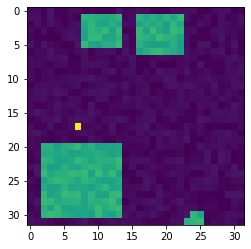

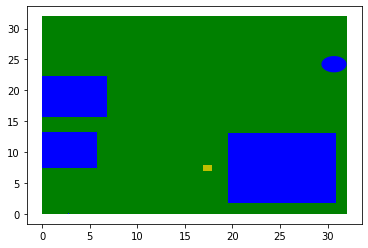

In [6]:
env1 = VisualEnvironment()
env1.plot2()
env1.plot()

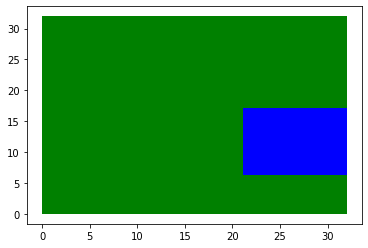

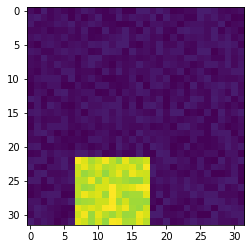

In [7]:
env2 = VisualEnvironment(includeRobot=False)
env2.plot()
env2.plot2()

In [ ]:
#### Additional exploratory code for saving matplotlib figure as numpy array...

In [44]:
print (fig)

Figure(432x288)


In [ ]:
fig.canvas.draw()
w,h = fig.canvas.get_width_height()
print ('{} x {}'.format(w, h))
buf = fig.canvas.tostring_argb()
print (len(buf))
print (buf[0:10])
buf_arr = np.frombuffer(buf, dtype=np.uint8)
print (buf_arr.shape)
print (buf_arr[0:10])

buf = fig.canvas.print_to_buffer()
print (buf)

In [36]:
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

In [38]:
fig_arr = fig2data(fig)
fig_arr.shape

/Users/pradeepkadubandi/.local/share/virtualenvs/LSBMP-L2RRT-AlqjJP_-/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


(432, 288, 4)

In [ ]:
# Exploratory code for playing with normal distribution 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


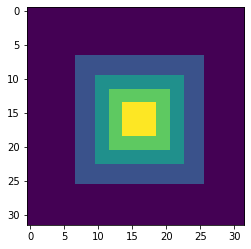

In [10]:
data = np.zeros((32,32), dtype=np.uint8)
center = np.array([16, 16])
var = 30
peak = 60
it = np.nditer(data, flags=['multi_index'], op_flags=['readwrite'])
while not it.finished:
    # distance = np.sum((center-it.multi_index) ** 2)  # Circular shape
    distance = np.max(np.abs(center-it.multi_index)) ** 2   # Square shape
    prob = np.exp(-distance/(2*var)) / np.sqrt(2 * np.pi * var)
    data[it.multi_index] = int(peak * prob)
    it.iternext()
    
plt.imshow(data, cmap=default_cmap)
print (data)

In [4]:
print (matplotlib.rcParams['image.cmap'])

viridis
